# 1 - Business Understanding
### Scenario:
Luis Xaviar the team analyst of the football team of Eibar FC recently was asked by the manager to review the performance of their last match
the manager wanted to know how he could improve his style of play in three areas of the game, passing, shooting and defending.
this would help improve not only his teams performance but other teams might find it useful as well to improve their own performance.
Using this football data Luis focused on these areas and came up with the following problems

## 1.Passing:
### You would look at this data to try and improve the build up of play and the potential of successful counter attacking:  
1.Analyzing the correlation between distance of a pass with the success rate.

2.Investigating is there any correlation between total amount of passes to shots taken 

3.Investigating the likelihood of a pass being inaccurate in the first half compared to the second half  


## 3.Attacking
### Look at this data to try and maximize your goal scoring efficiency and increase the likelihood of scoring a goal:
4.Likelihood of Eibar Hitting the target

5.Investigating the volume of shots attempted between the first and second half.

6.Analyzing do headers have a higher shot to goal ratio than shooting with the right foot

7.Analyzing the probability of a player scoring a goal(+/- 5 minutes before the half ends)

## Numerical Predictions
1. Pass Success prediction- Are we able to predict the success probability of a pass using time of the match and the distance of the pass


# 2 - Data Mining:


## Library Imports

In [355]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#To set figure size
from matplotlib.pyplot import figure

## Data Import

In [356]:

data= pd.read_csv("outputDataMining.csv")

# 3 - Data Cleaning:

In [357]:
# Drop the columns that are not needed

data.drop(['bad_behaviour_card'], axis=1, inplace=True)
data.drop(['ball_receipt_outcome'], axis=1, inplace=True)
data.drop(['ball_recovery_recovery_failure'], axis=1, inplace=True)
data.drop(['carry_end_location'], axis=1, inplace=True)
data.drop(['clearance_body_part'], axis=1, inplace=True)
data.drop(['clearance_head'], axis=1, inplace=True)
data.drop(['clearance_left_foot'], axis=1, inplace=True)
data.drop(['clearance_right_foot'], axis=1, inplace=True)
data.drop(['counterpress'], axis=1, inplace=True)
data.drop(['dribble_no_touch'], axis=1, inplace=True)
data.drop(['foul_committed_advantage'], axis=1, inplace=True)
data.drop(['foul_committed_card'], axis=1, inplace=True)
data.drop(['foul_committed_type'], axis=1, inplace=True)
data.drop(['foul_won_advantage'], axis=1, inplace=True)
data.drop(['goalkeeper_body_part'], axis=1, inplace=True)
data.drop(['goalkeeper_end_location'], axis=1, inplace=True)
data.drop(['location'], axis=1, inplace=True)
data.drop(['match_id'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['index'], axis=1, inplace=True)
data.drop(['miscontrol_aerial_won'], axis=1, inplace=True)
data.drop(['off_camera'], axis=1, inplace=True)
data.drop(['out'], axis=1, inplace=True)
data.drop(['pass_angle'], axis=1, inplace=True)
data.drop(['pass_assisted_shot_id'], axis=1, inplace=True)
data.drop(['pass_end_location'], axis=1, inplace=True)
data.drop(['pass_cut_back'], axis=1, inplace=True)
data.drop(['pass_goal_assist'], axis=1, inplace=True)
data.drop(['possession_team_id'], axis=1, inplace=True)
data.drop(['pass_inswinging'], axis=1, inplace=True)
data.drop(['pass_miscommunication'], axis=1, inplace=True)
data.drop(['pass_shot_assist'], axis=1, inplace=True)
data.drop(['pass_no_touch'], axis=1, inplace=True)
data.drop(['pass_outswinging'], axis=1, inplace=True)
data.drop(['pass_recipient'], axis=1, inplace=True)
data.drop(['player_id'], axis=1, inplace=True)
data.drop(['pass_straight'], axis=1, inplace=True)
data.drop(['pass_switch'], axis=1, inplace=True)
data.drop(['pass_through_ball'], axis=1, inplace=True)
data.drop(['player'], axis=1, inplace=True)
data.drop(['related_events'], axis=1, inplace=True)
data.drop(['shot_aerial_won'], axis=1, inplace=True)
data.drop(['shot_end_location'], axis=1, inplace=True)
data.drop(['shot_freeze_frame'], axis=1, inplace=True)
data.drop(['shot_key_pass_id'], axis=1, inplace=True)
data.drop(['shot_statsbomb_xg'], axis=1, inplace=True)
data.drop(['shot_type'], axis=1, inplace=True)
data.drop(['substitution_outcome'], axis=1, inplace=True)
data.drop(['substitution_replacement'], axis=1, inplace=True)
data.drop(['tactics'], axis=1, inplace=True)
data.drop(['timestamp'], axis=1, inplace=True)
data.drop(['team_id'], axis=1, inplace=True)
data.drop(['type'], axis=1, inplace=True)
data.drop(['under_pressure'], axis=1, inplace=True)
data.drop(['block_deflection'], axis=1, inplace=True)
data.drop(['clearance_aerial_won'], axis=1, inplace=True)
data.drop(['dribble_nutmeg'], axis=1, inplace=True)
data.drop(['dribble_outcome'], axis=1, inplace=True)
data.drop(['foul_won_defensive'], axis=1, inplace=True)
data.drop(['goalkeeper_position'], axis=1, inplace=True)
data.drop(['interception_outcome'], axis=1, inplace=True)
data.drop(['pass_aerial_won'], axis=1, inplace=True)
data.drop(['pass_cross'], axis=1, inplace=True)
data.drop(['pass_deflected'], axis=1, inplace=True)
data.drop(['pass_height'], axis=1, inplace=True)
data.drop(['pass_type'], axis=1, inplace=True)
data.drop(['duration'], axis=1, inplace=True)
data.drop(['goalkeeper_outcome'], axis=1, inplace=True)
data.drop(['goalkeeper_technique'], axis=1, inplace=True)
data.drop(['goalkeeper_type'], axis=1, inplace=True)
data.drop(['pass_body_part'], axis=1, inplace=True)
data.drop(['play_pattern'], axis=1, inplace=True)
data.drop(['position'], axis=1, inplace=True)
data.drop(['possession_team'], axis=1, inplace=True)
data.drop(['shot_deflected'], axis=1, inplace=True)
data.drop(['possession'], axis=1, inplace=True)
data.drop(['pass_technique'], axis=1, inplace=True)
data.drop(['duel_outcome'], axis=1, inplace=True)
data.drop(['duel_type'], axis=1, inplace=True)
data.drop(['period'], axis=1, inplace=True)
data.drop(['shot_first_time'], axis=1, inplace=True)
data.drop(['shot_technique'], axis=1, inplace=True)

## Missing Values

In [358]:
# Drop the rows where all elements are missing.
columns_to_check =['pass_length','pass_outcome','shot_outcome','second','minute','shot_body_part']
data.dropna(subset=columns_to_check, how='all', inplace=True)

# if pass length is not null and pass outcome is null, then pass outcome is complete
data.loc[data['pass_length'].notnull() & data['pass_outcome'].isnull(),'pass_outcome'] = 'Complete'

# Fill the missing values with the value N/A
data.fillna("N/A", inplace = True)

# Convert the pass length to float and round to 1 decimal place
#Ran into problem with converting pass_length to N/A had to convert to numeric first and then fill the missing values with 0 instead of N/A
data['pass_length'] = pd.to_numeric(data['pass_length'], errors='coerce').fillna(0).round(1)
data['pass_length'] = data ['pass_length']


# Checking the missing values in the dataset.
print(data.isnull().sum())

print(data)

minute            0
pass_length       0
pass_outcome      0
second            0
shot_body_part    0
shot_outcome      0
team              0
dtype: int64
      minute  pass_length pass_outcome  second shot_body_part shot_outcome  \
0          0          0.0          N/A       0            N/A          N/A   
1          0          0.0          N/A       0            N/A          N/A   
2          0          0.0          N/A       0            N/A          N/A   
3          0          0.0          N/A       0            N/A          N/A   
4         45          0.0          N/A       0            N/A          N/A   
...      ...          ...          ...     ...            ...          ...   
2609      45          0.0          N/A      49            N/A          N/A   
2610      72          0.0          N/A      42            N/A          N/A   
2611      79          0.0          N/A       2            N/A          N/A   
2612      53          0.0          N/A      41            N/A      

C:\Users\wwwno\AppData\Local\Temp\ipykernel_5028\2742501284.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("N/A", inplace = True)


## Outliers

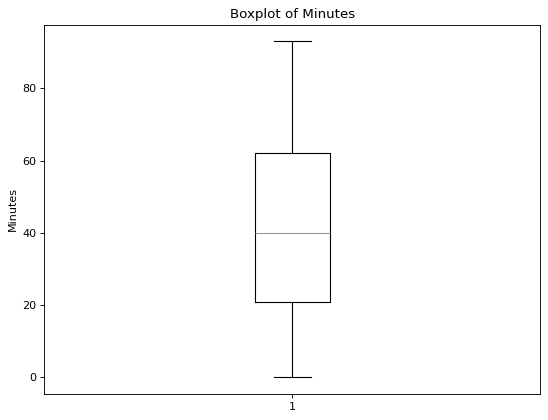

No outliers in Minutes
count    2614.000000
mean       41.444529
std        25.125764
min         0.000000
25%        21.000000
50%        40.000000
75%        62.000000
max        93.000000
Name: minute, dtype: float64


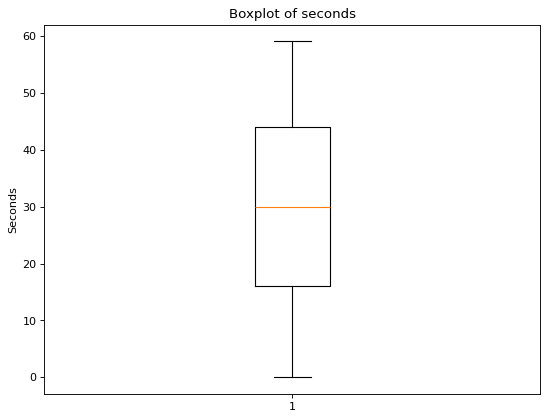

count    2614.000000
mean       29.761285
std        16.622057
min         0.000000
25%        16.000000
50%        30.000000
75%        44.000000
max        59.000000
Name: second, dtype: float64

No outliers in seconds


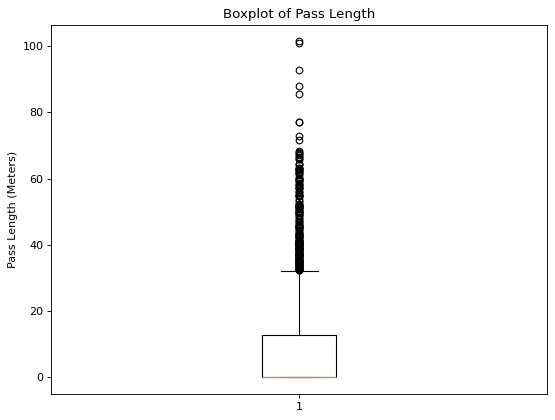

count    2614.000000
mean        8.192196
std        14.621349
min         0.000000
25%         0.000000
50%         0.000000
75%        12.800000
max       101.400000
Name: pass_length, dtype: float64

 Pass length has outliers past 35 meters but they are going to be kept as they are statistically possible


In [359]:
#Checking numerical values for outliers 
      
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.minute)
plt.title("Boxplot of Minutes")
plt.ylabel("Minutes")
plt.show()
print("No outliers in Minutes")

print(data.minute.describe())
#decide to keep these values as look reasonable



figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.second)
plt.title("Boxplot of seconds")
plt.ylabel("Seconds")
plt.show()
print(data.second.describe())
print("\nNo outliers in seconds")



figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.pass_length)
plt.title("Boxplot of Pass Length")
plt.ylabel("Pass Length (Meters)") 
plt.show()
print(data.pass_length.describe())
print("\n Pass length has outliers past 35 meters but they are going to be kept as they are statistically possible")


#data.to_csv('data.csv', index=False)  # save as csv file
      

# 4 - Data Exploration:

## Univaraite Analysis

### Categorical 

In [360]:
# Univariate for categorical variables such as pass outcome, shot body part, shot outcome, shot technique, team

print(data.pass_outcome.unique())
print(data.shot_body_part.unique())
print(data.shot_outcome.unique())
print(data.team.unique())

['N/A' 'Complete' 'Out' 'Incomplete' 'Unknown' 'Pass Offside'
 'Injury Clearance']
['N/A' 'Head' 'Right Foot' 'Left Foot']
['N/A' 'Off T' 'Saved' 'Blocked' 'Goal' 'Post' 'Wayward']
['Levante UD' 'Eibar']



#### Pass outcome

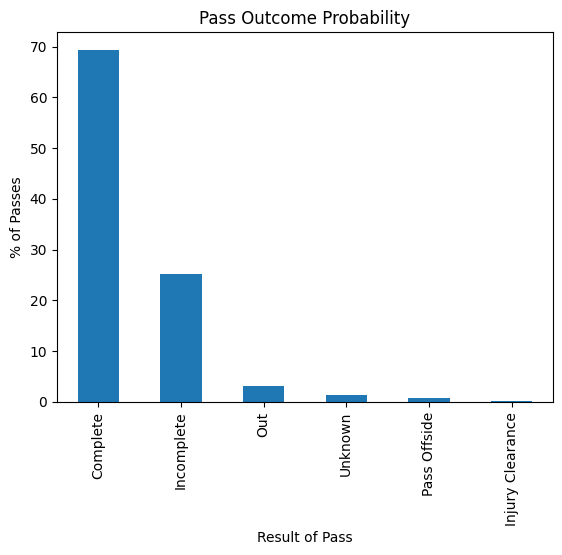

Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted


In [361]:
#________________________________________Pass Outcome_______________________________________________________

#Filtering the N/A out for pass outcome
filtered_PassOutcome = data[data['pass_outcome'] != 'N/A']

# Calculate the percentage of each pass outcome probability.
passOutcome_percentage = filtered_PassOutcome['pass_outcome'].value_counts(normalize=True)*100
passOutcome_percentage.plot.bar()
plt.title("Pass Outcome Probability")
plt.xlabel("Result of Pass")
plt.ylabel("% of Passes")
plt.show() #Show the plot
print("Nearly 70% of attempted passes are completed while the other 30% make up for unsuccessful passes and passes that are intercepted") 



#### Shot body part

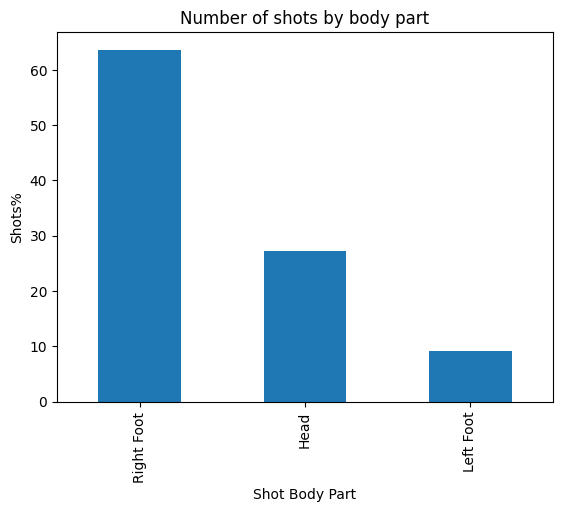

Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot


In [362]:
#________________________________________Shot body part_______________________________________________________

#Filtering the N/A out for shot body part
filtered_Shot_Body_Part = data[data['shot_body_part'] != 'N/A']

# Calculate the percentage of each shot body part
shot_Body_Part_Percentage = filtered_Shot_Body_Part['shot_body_part'].value_counts(normalize=True)*100
shot_Body_Part_Percentage.plot.bar()
plt.title("Number of shots by body part")
plt.xlabel("Shot Body Part")
plt.ylabel("Shots%")
plt.show() #Show the plot
print("Just over 60% of shots are taken with their right foot , just over 25% are headers and the rest are taken with their left foot") 

#### Shot outcome


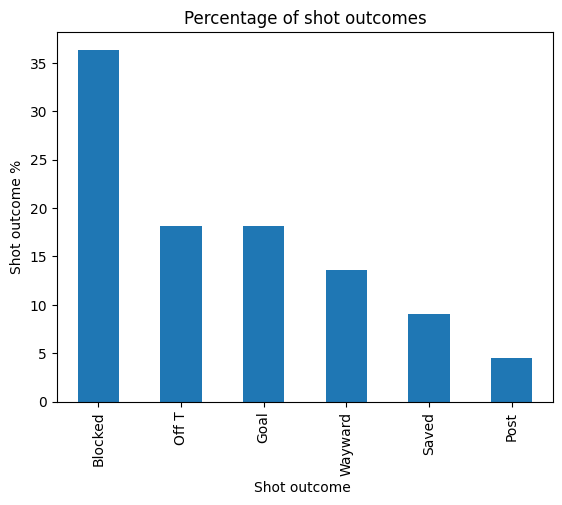

From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked


In [363]:
#________________________________________Shot outcome_______________________________________________________

#Filtering the N/A out for Shot outcome  outcome
filtered_Shot_outcome = data[data['shot_outcome'] != 'N/A']

# Calculate the percentage of each shot outcome by type
shot_outcome_Percentage = filtered_Shot_outcome['shot_outcome'].value_counts(normalize=True)*100
shot_outcome_Percentage.plot.bar()
plt.title("Percentage of shot outcomes")
plt.xlabel("Shot outcome ")
plt.ylabel("Shot outcome %")
plt.show() #Show the plot
print("From all shots taken approximately 35% are on target, 30% are off target and 35% are blocked") 

#### Team

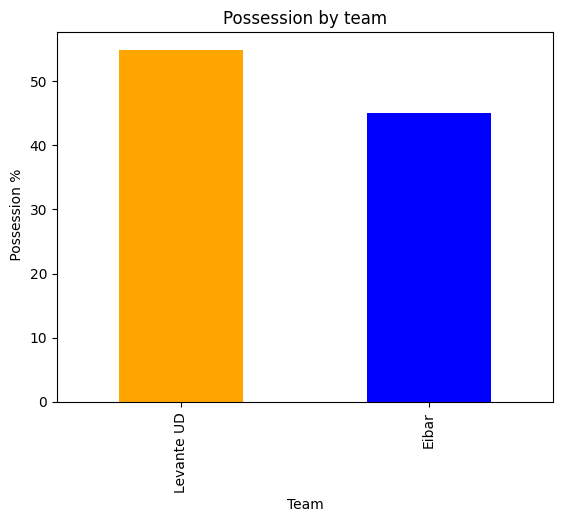

Levante had approximately 55% of the possession during the game while Eibar had 45%


In [364]:
#________________________________________Shot technique_______________________________________________________

# Calculate the total time a team had possession of the ball
team_count = data['team'].value_counts(normalize=True)*100
team_count.plot.bar(color =['orange','blue'])
plt.title("Possession by team")
plt.xlabel("Team")
plt.ylabel(" Possession %")
plt.show() #Show the plot
print("Levante had approximately 55% of the possession during the game while Eibar had 45%") 


### Numerical Variables

In [365]:
summaryNumerical = data.describe()
print(summaryNumerical)



            minute  pass_length       second
count  2614.000000  2614.000000  2614.000000
mean     41.444529     8.192196    29.761285
std      25.125764    14.621349    16.622057
min       0.000000     0.000000     0.000000
25%      21.000000     0.000000    16.000000
50%      40.000000     0.000000    30.000000
75%      62.000000    12.800000    44.000000
max      93.000000   101.400000    59.000000


#### Minute

Plot 1: Activity by Minute



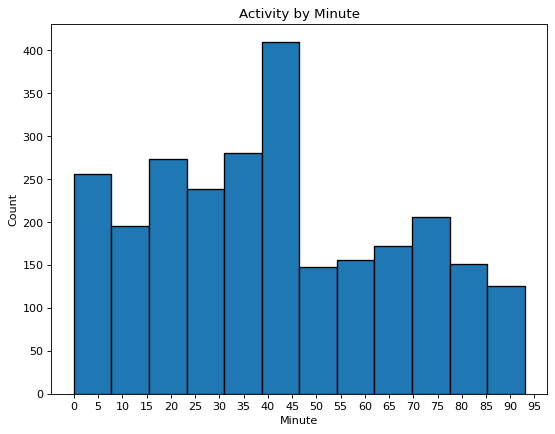

Plot 1: Activity by Minute

The last 10 minutes of the first half had the most activity
All other time periods where relatively the same except for the first 10 minutes of the second half which had the least activity

count    2614.000000
mean       41.444529
std        25.125764
min         0.000000
25%        21.000000
50%        40.000000
75%        62.000000
max        93.000000
Name: minute, dtype: float64


In [366]:
#________________________________________Minute_______________________________________________________

# styling of minute diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.minute,edgecolor='black', linewidth=1.2, bins=12)

# set the ticks and labels to display as the x axis
tickvalues = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
ticklabels = ["0","5","10","15","20","25","30","35","40","45","50","55","60","65","70","75","80","85","90","95"]

plt.xticks(tickvalues,ticklabels)
plt.title("Activity by Minute")
plt.ylabel("Count")
plt.xlabel("Minute")
print("Plot 1: Activity by Minute\n")
plt.show()
print("Plot 1: Activity by Minute\n")
print("The last 10 minutes of the first half had the most activity")
print("All other time periods where relatively the same except for the first 10 minutes of the second half which had the least activity\n")

# describe the data showing min, max, mean, std, count, 25%, 50%, 75%
print(data.describe().minute)


#### Second

Plot 1: Activity by second



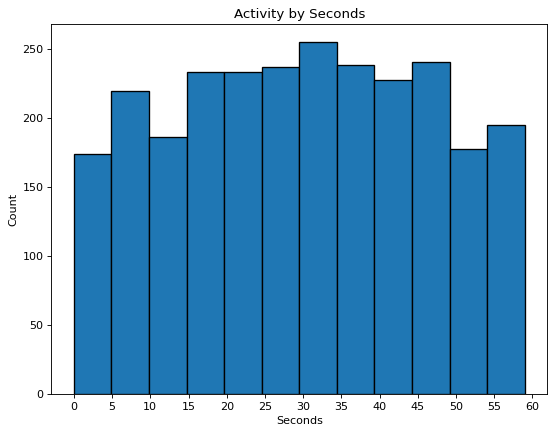

Plot 1: Activity by second

The majority of activity happen equal throughout the minute  with the exception 
10 to 15 being the lowest And 20 to 25 being the highest

count    2614.000000
mean       29.761285
std        16.622057
min         0.000000
25%        16.000000
50%        30.000000
75%        44.000000
max        59.000000
Name: second, dtype: float64


In [367]:
#________________________________________Second _______________________________________________________

# styling of second diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.second,edgecolor='black', linewidth=1.2, bins=12)

# set the ticks and labels to display as the x axis
tickvalues = [0,5,10,15,20,25,30,35,40,45,50,55,60]
ticklabels = ["0","5","10","15","20","25","30","35","40","45","50","55","60"]

plt.xticks(tickvalues,ticklabels)
plt.title("Activity by Seconds")
plt.ylabel("Count")
plt.xlabel("Seconds")
print("Plot 1: Activity by second\n")
plt.show()
print("Plot 1: Activity by second\n")
print("The majority of activity happen equal throughout the minute  with the exception \n10 to 15 being the lowest And 20 to 25 being the highest\n")

# describe the data 
print(data.describe().second)

#### Pass Length

Plot 1: Pass Length



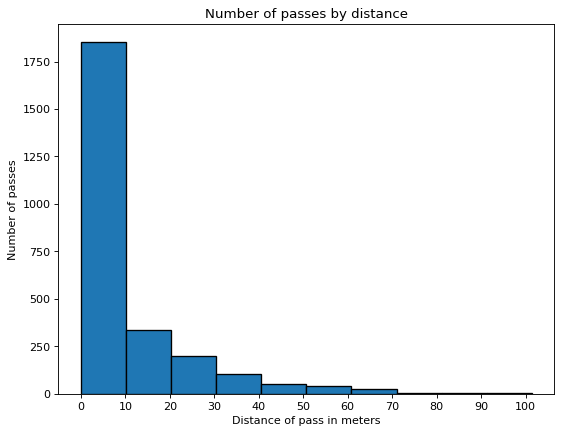

Plot 1: Pass Length

Most passes are made in the 0 - 20 meters

count    2614.000000
mean        8.192196
std        14.621349
min         0.000000
25%         0.000000
50%         0.000000
75%        12.800000
max       101.400000
Name: pass_length, dtype: float64
Plot 2: Pass Length



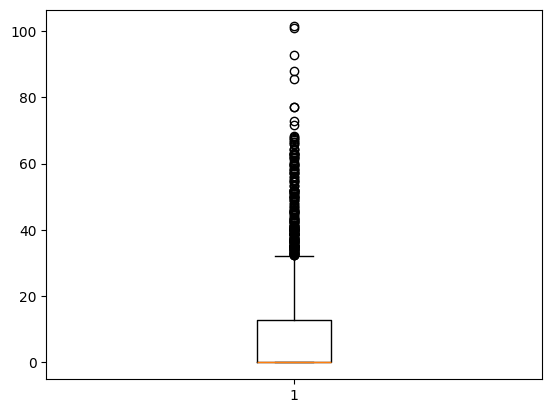

Plot 2: Pass Length

The majority of passes are made 0 to 60 meters



In [368]:
#________________________________________Pass Length _______________________________________________________

# styling of pass length diagram
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x=data.pass_length,edgecolor='black', linewidth=1.2)

# set the ticks and labels to display as the x axis
tickvalues = [0,10,20,30,40,50,60,70,80,90,100]
ticklabels = ["0","10","20","30","40","50","60","70","80","90","100"]

plt.xticks(tickvalues,ticklabels)
plt.title("Number of passes by distance")
plt.ylabel("Number of passes")
plt.xlabel("Distance of pass in meters")
print("Plot 1: Pass Length\n")
plt.show()
print("Plot 1: Pass Length\n")
print("Most passes are made in the 0 - 20 meters\n")

# describe the data of pass length
print(data.describe().pass_length)

# Boxplot for pass length
plt.boxplot(x=data.pass_length)
print("Plot 2: Pass Length\n")
plt.show()
print("Plot 2: Pass Length\n")
print("The majority of passes are made 0 to 60 meters\n")


## Bivariate Analysis

### Numerical - Numerical

Plot 1: Minute vs Pass Length


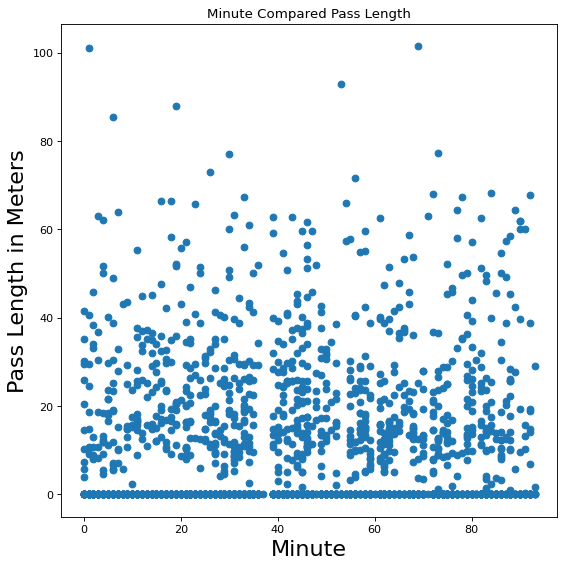

Plot 1: Minute vs Pass Length


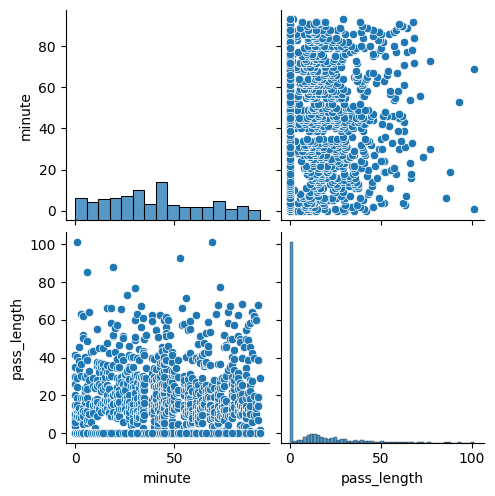

Plot 1: Minute vs Pass Length


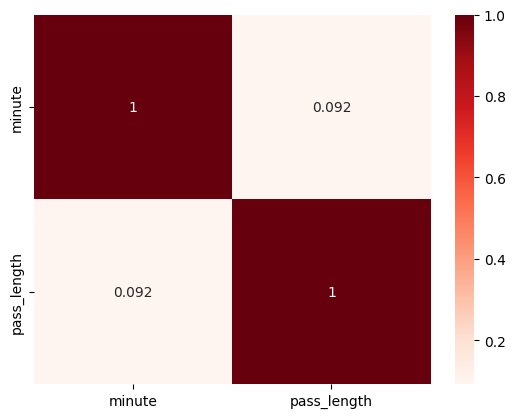

             pass_length  minute
pass_length       1.0000  0.0918
minute            0.0918  1.0000
Plot 1: Minute vs Pass Length
There seems to be a very weak positive correlation between the minute of play and the pass length
Plot 2: Second vs Pass Length


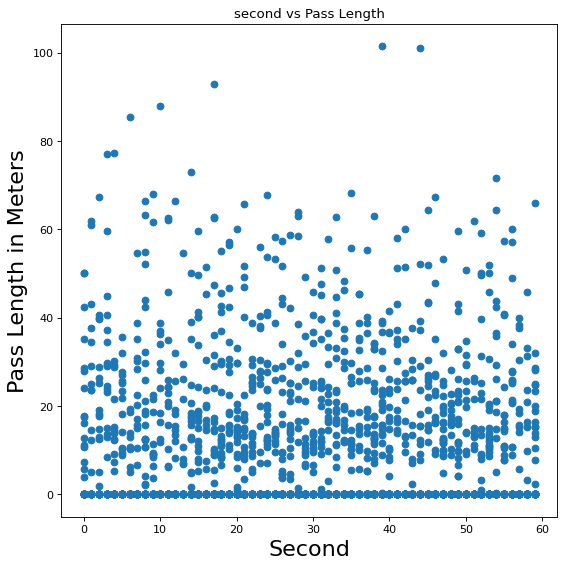

Plot 2: Second vs Pass Length


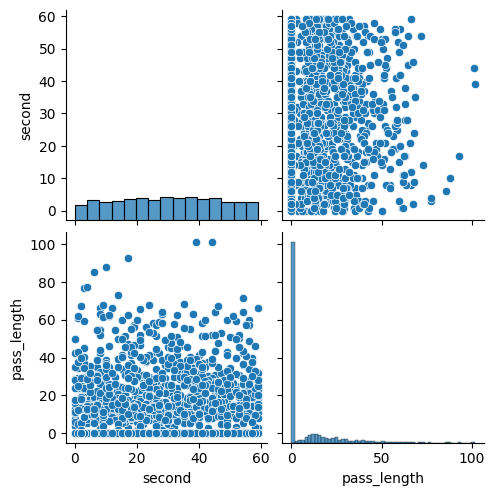

Plot 2: Second vs Pass Length


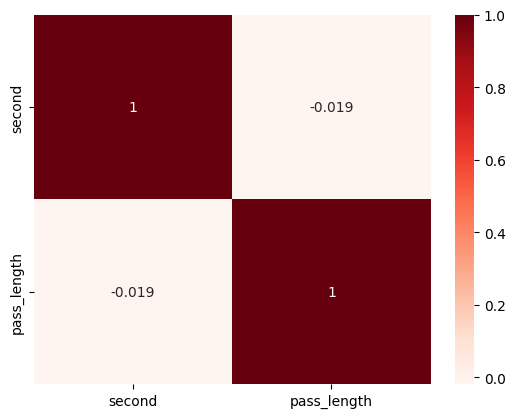

             pass_length   second
pass_length      1.00000 -0.01931
second          -0.01931  1.00000
Plot 2: Second vs Pass Length
There seems to be a very weak negative correlation between the period of play and seconds
Plot 3: Second vs Minute


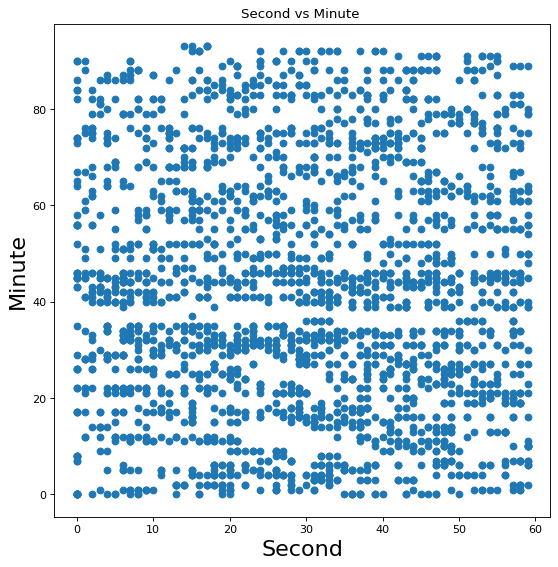

Plot 3: Second vs Minute


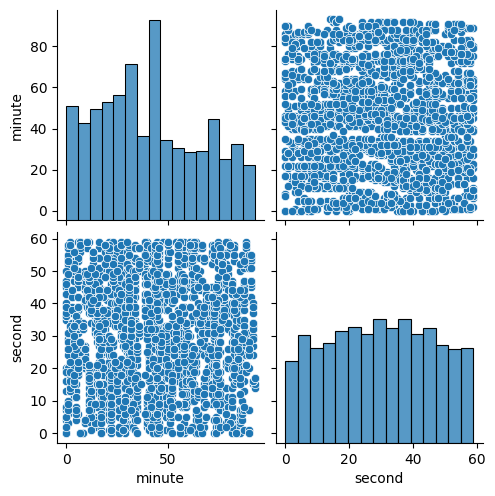

Plot 3: Second vs Minute


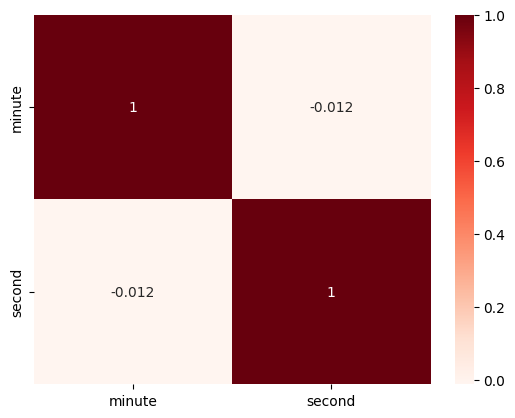

          minute    second
minute  1.000000 -0.011631
second -0.011631  1.000000
Plot 3: Second vs Minute
There seems to be only a very weak negative correlation between the minute of play and second of play 


In [369]:
#________________________________________Pass Length / minute _______________________________________________________

#plot the scatter plot of pass length and minute variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.minute,data.pass_length)
plt.title("Minute Compared Pass Length")
plt.xlabel("Minute", size=20)
plt.ylabel("Pass Length in Meters", size=20)
print("Plot 1: Minute vs Pass Length")
plt.show()

# Creating a matrix using period and minute as rows and columns
sns.pairplot(data = data, vars=['minute','pass_length'])
print("Plot 1: Minute vs Pass Length")
plt.show()


#plot the correlation matrix of minute and pass length in data dataframe.
sns.heatmap(data[['minute','pass_length']].corr(), annot=True, cmap = 'Reds')
print("Plot 1: Minute vs Pass Length")
plt.show()

#Calculate correlation
print(data[['pass_length','minute']].corr())
print("Plot 1: Minute vs Pass Length")
print("There seems to be a very weak positive correlation between the minute of play and the pass length")

#________________________________________Pass Length / second _______________________________________________________

#plot the scatter plot of Second and pass length variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.second,data.pass_length)
plt.title("second vs Pass Length")
plt.xlabel("Second", size=20)
plt.ylabel("Pass Length in Meters", size=20)
print("Plot 2: Second vs Pass Length")
plt.show()

# Creating a matrix using second, pass_length as rows and columns
sns.pairplot(data = data, vars=['second','pass_length'])
print("Plot 2: Second vs Pass Length")
plt.show()

#plot the correlation matrix of second and pass length in data dataframe.
sns.heatmap(data[['second','pass_length']].corr(), annot=True, cmap = 'Reds')
print("Plot 2: Second vs Pass Length")
plt.show()

#Calculate correlation
print(data[['pass_length','second']].corr())
print("Plot 2: Second vs Pass Length")
print("There seems to be a very weak negative correlation between the period of play and seconds")

#________________________________________Minute / second _______________________________________________________

#plot the scatter plot of minute and second variable in data
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data.second,data.minute)
plt.title("Second vs Minute ")
plt.xlabel("Second", size=20)
plt.ylabel("Minute", size=20)
print("Plot 3: Second vs Minute")
plt.show()

# Creating a matrix using minute and second as rows and columns
sns.pairplot(data = data, vars=['minute','second'])
print("Plot 3: Second vs Minute")
plt.show()


#plot the correlation matrix of minute and second in data dataframe.
sns.heatmap(data[['minute','second']].corr(), annot=True, cmap = 'Reds')
print("Plot 3: Second vs Minute")
plt.show()

#Calculate correlation
print(data[['minute','second']].corr())
print("Plot 3: Second vs Minute")
print("There seems to be only a very weak negative correlation between the minute of play and second of play ")


### Numerical - Categorical

####   Team

________________________________________team by minute _______________________________________________________
Mean Team by minute:
team
Eibar         41.664122
Levante UD    41.264111
Name: minute, dtype: float64

Median Salary by Response:
team
Eibar         40.0
Levante UD    40.0
Name: minute, dtype: float64

Plot 1:Team by minute:



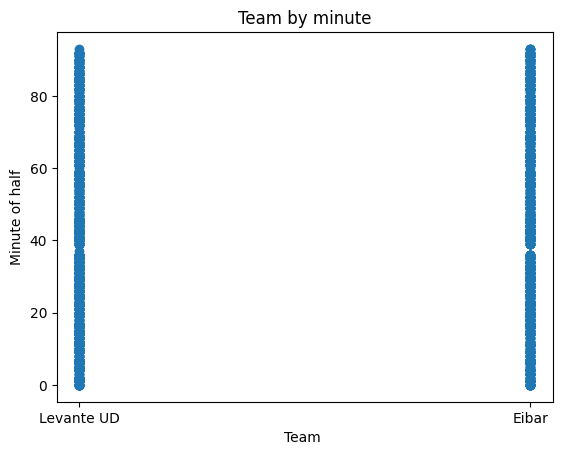

Plot 1:Team by minute:



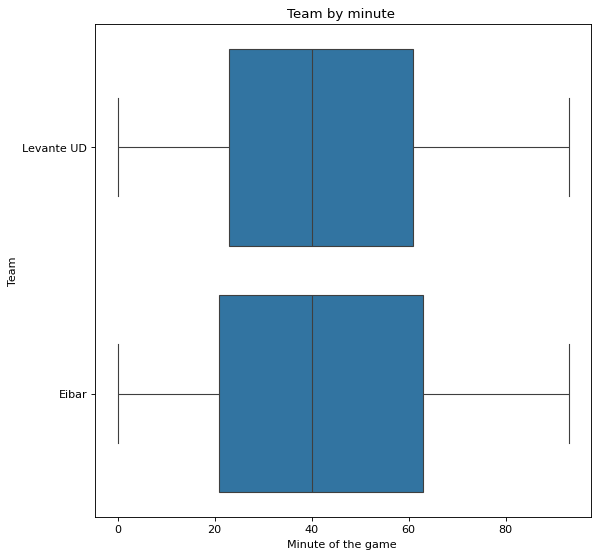

Plot 1:Team by minute interpretation:
Team by minute is almost identical in both periods 

________________________________________team by second _______________________________________________________
Mean team by second:
team
Eibar         29.237489
Levante UD    30.191638
Name: second, dtype: float64

Median Team by second:
team
Eibar         29.0
Levante UD    31.0
Name: second, dtype: float64

Plot 2:Team by second:



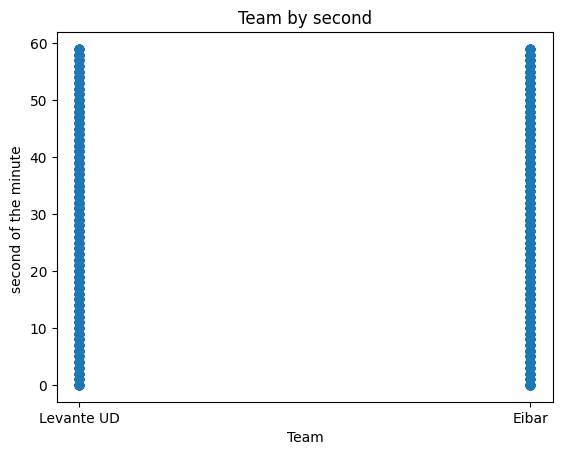

Plot 2:Team by second:



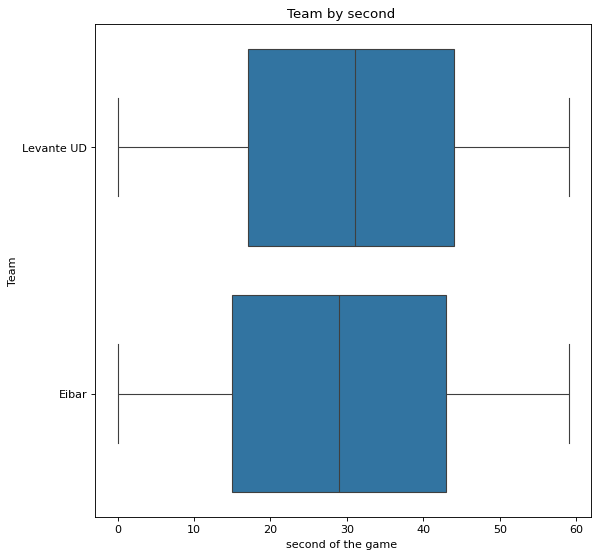

Plot 2:Team by second interpretation:
Eibar has possession marginally earlier in the minute than Levante

________________________________________Team by pass length _______________________________________________________
Mean team by Pass length :
team
Eibar         7.894572
Levante UD    8.436725
Name: pass_length, dtype: float64

Median Team by pass length :
team
Eibar         0.0
Levante UD    0.0
Name: pass_length, dtype: float64

Plot 3:Team by pass length:



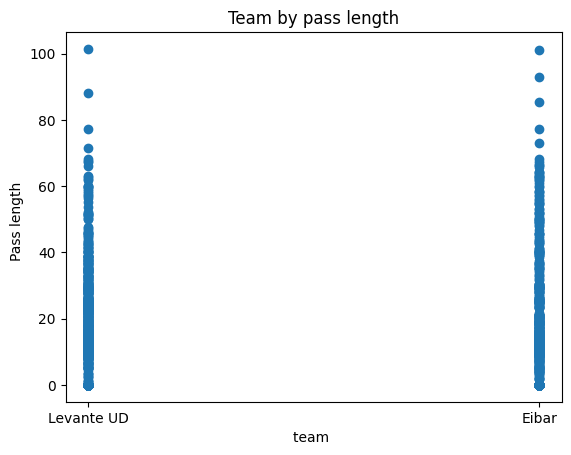

Plot 3:Team by pass length:



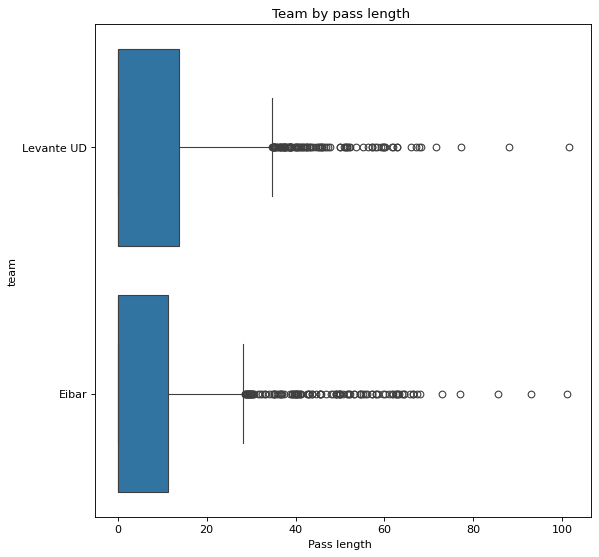

Plot 3:Team by pass length interpretation:
Levante pass length is marginally longer by around 3 meters than Eibar on average 



In [370]:
print("________________________________________team by minute _______________________________________________________")

#Investigate shot technique and minute columns from our dataset.


#groupby the response to find the mean and median of the team with minutes separately.
print("Mean Team by minute:")
meanSalaryResponse=data.groupby('team')['minute'].mean()
print(meanSalaryResponse)

print("\nMedian Salary by Response:")
print(data.groupby('team')['minute'].median())

#plot the boxplot of team by minute
plt.scatter(data['team'],data['minute'])
plt.title("Team by minute")
plt.xlabel("Team ")
plt.ylabel("Minute of half")
print("\nPlot 1:Team by minute:\n")
plt.show()



# display the boxplot of Team by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=data['minute'], y=data['team'])
plt.title("Team by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Team")
print("Plot 1:Team by minute:\n")
plt.show()
print("Plot 1:Team by minute interpretation:\nTeam by minute is almost identical in both periods \n")
 
print("________________________________________team by second _______________________________________________________")

 #Investigate team and second columns from our dataset.

#groupby the response to find the mean and median of the team with second separately.
print("Mean team by second:")
mean_team_second=data.groupby('team')['second'].mean()
print(mean_team_second)

print("\nMedian Team by second:")
print(data.groupby('team')['second'].median())

#plot the boxplot of team by second
plt.scatter(data['team'],data['second'])
plt.title("Team by second")
plt.xlabel("Team")
plt.ylabel("second of the minute ")
print("\nPlot 2:Team by second:\n")
plt.show()



# display the boxplot of team by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=data['second'], y=data['team'])
plt.title("Team by second ")
plt.xlabel("second of the game ")
plt.ylabel("Team")
print("Plot 2:Team by second:\n")
plt.show()
print("Plot 2:Team by second interpretation:\nEibar has possession marginally earlier in the minute than Levante\n")


print("________________________________________Team by pass length _______________________________________________________")
 #Investigate team and pass length  columns from our dataset.

#groupby the response to find the mean and median of the team with pass length  separately.
print("Mean team by Pass length :")
mean_team_by_pass_length=data.groupby('team')['pass_length'].mean()
print(mean_team_by_pass_length)

print("\nMedian Team by pass length :")
print(data.groupby('team')['pass_length'].median())

#plot the boxplot of team by pass length
plt.scatter(data['team'],data['pass_length'])
plt.title("Team by pass length")
plt.xlabel("team ")
plt.ylabel("Pass length  ")
print("\nPlot 3:Team by pass length:\n")
plt.show()


# display the boxplot of team by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=data['pass_length'], y=data['team'])
plt.title("Team by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("team")
print("Plot 3:Team by pass length:\n")
plt.show()
print("Plot 3:Team by pass length interpretation:\nLevante pass length is marginally longer by around 3 meters than Eibar on average \n")



#### Shot body part

________________________________________Shot body part by minute _______________________________________________________
Mean Shot body part by minute:
shot_body_part
Head          47.166667
Left Foot     40.500000
Right Foot    43.785714
Name: minute, dtype: float64

Median Shot body part by minute:
shot_body_part
Head          45.5
Left Foot     40.5
Right Foot    41.5
Name: minute, dtype: float64

Plot 1:shot body part by minute:



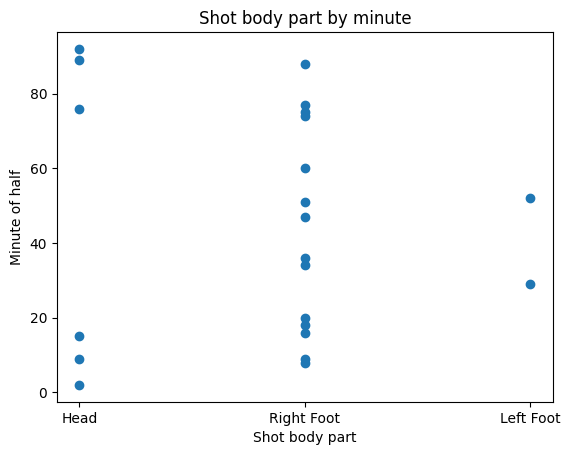

Plot 1:shot body part by minute:



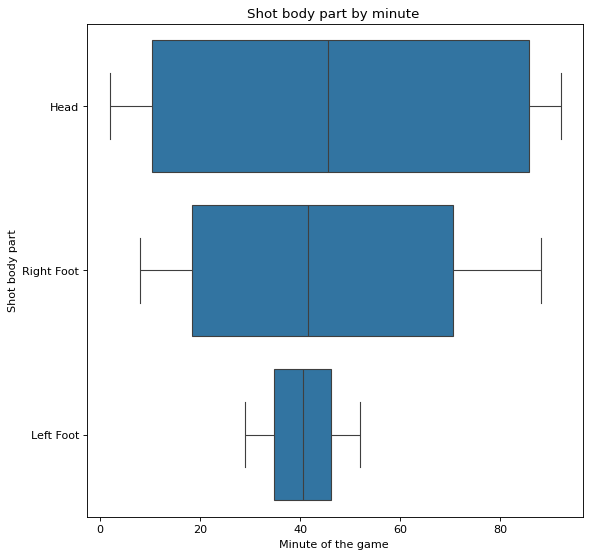

Plot 1:shot body part by minute interpretation:
Headers are taken throughout the game while shots with the right foot happen most frequently occuring in the 20 to 65 minute mark
 while left footed shots where almost all taken at the end of the first half 
________________________________________Shot body part by second _______________________________________________________
Mean Shot body part by second:
shot_body_part
Head          43.666667
Left Foot     11.500000
Right Foot    34.000000
Name: second, dtype: float64

Median Shot body part by Second:
shot_body_part
Head          44.5
Left Foot     11.5
Right Foot    35.0
Name: second, dtype: float64

Plot 2:shot body part by second:



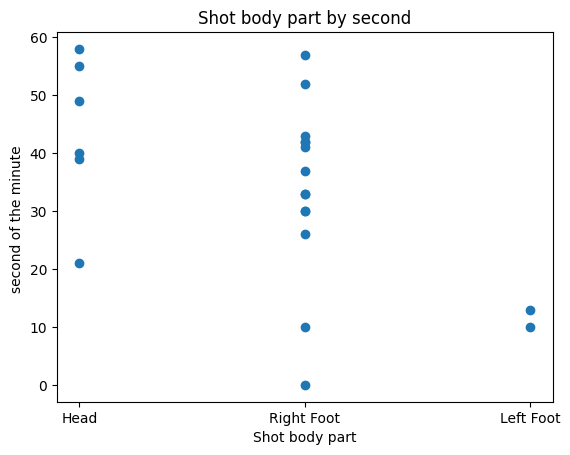

Plot 2:shot body part by second:



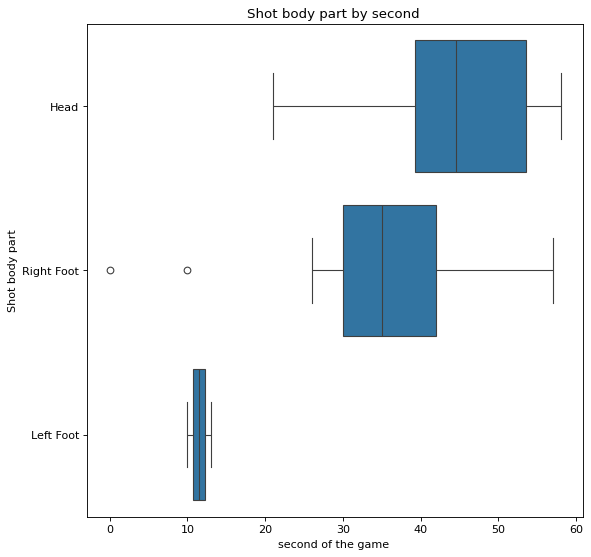

Plot 2:shot body part by second interpretation:
nShots and headers are take most often in the second half of the minute
 while left footed shots are taken early in the minute

________________________________________shot body part by pass length _______________________________________________________
Mean Shot body part by Pass length :
shot_body_part
Head          0.0
Left Foot     0.0
Right Foot    0.0
Name: pass_length, dtype: float64

Median Shot body part by pass length :
shot_body_part
Head          0.0
Left Foot     0.0
Right Foot    0.0
Name: pass_length, dtype: float64

Plot 3:shot body part by pass length:



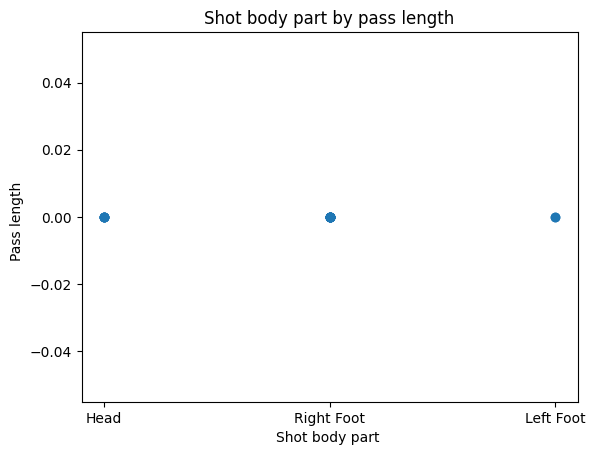

Plot 3:shot body part by pass length:



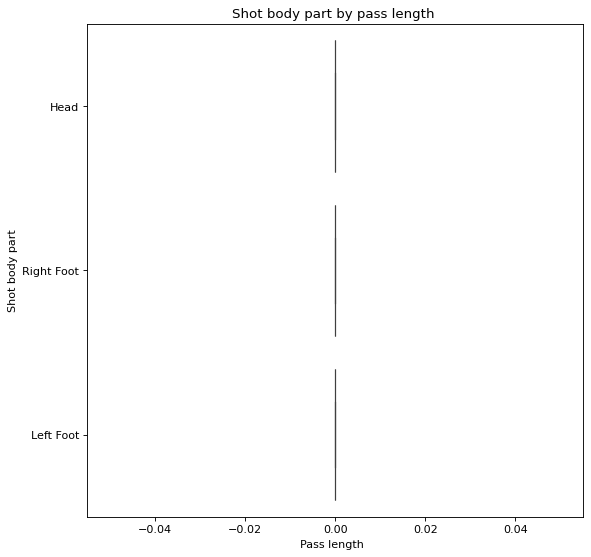

Plot 3:shot body part by pass length interpretation:
Shot body part by pass length:
There is no correlation between the pass length and the shot body part



In [371]:
print("________________________________________Shot body part by minute _______________________________________________________")
#Investigate Shot body part and minute columns from our dataset.

filtered_shot_body_part = data[data['shot_body_part'] != 'N/A']

#groupby the response to find the mean and median of the Shot body part with minutes separately.
print("Mean Shot body part by minute:")
mean_shot_body_part_minute=filtered_shot_body_part.groupby('shot_body_part')['minute'].mean()
print(mean_shot_body_part_minute)

print("\nMedian Shot body part by minute:")
print(filtered_shot_body_part.groupby('shot_body_part')['minute'].median())

#plot the boxplot of Shot body part by minute
plt.scatter(filtered_shot_body_part['shot_body_part'],filtered_shot_body_part['minute'])
plt.title("Shot body part by minute")
plt.xlabel("Shot body part")
plt.ylabel("Minute of half")
print("\nPlot 1:shot body part by minute:\n")
plt.show()



# display the boxplot of Shot body part by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_body_part['minute'], y=filtered_shot_body_part['shot_body_part'])
plt.title("Shot body part by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot body part")
print("Plot 1:shot body part by minute:\n")
plt.show()
print("Plot 1:shot body part by minute interpretation:\nHeaders are taken throughout the game while shots with the right foot happen most frequently occuring in the 20 to 65 minute mark\n while left footed shots where almost all taken at the end of the first half ")
 

print("________________________________________Shot body part by second _______________________________________________________")

 #Investigate shot technique and minute columns from our dataset.

#groupby the response to find the mean and median of the Shot body part with second separately.
print("Mean Shot body part by second:")
mean_shot_body_part_second=filtered_shot_body_part.groupby('shot_body_part')['second'].mean()
print(mean_shot_body_part_second)

print("\nMedian Shot body part by Second:")
print(filtered_shot_body_part.groupby('shot_body_part')['second'].median())

#plot the boxplot of Shot body part by second
plt.scatter(filtered_shot_body_part['shot_body_part'],filtered_shot_body_part['second'])
plt.title("Shot body part by second")
plt.xlabel("Shot body part")
plt.ylabel("second of the minute ")
print("\nPlot 2:shot body part by second:\n")
plt.show()



# display the boxplot of Shot body part by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_body_part['second'], y=filtered_shot_body_part['shot_body_part'])
plt.title("Shot body part by second ")
plt.xlabel("second of the game ")
plt.ylabel("Shot body part")
print("Plot 2:shot body part by second:\n")
plt.show()
print("Plot 2:shot body part by second interpretation:\nnShots and headers are take most often in the second half of the minute\n while left footed shots are taken early in the minute\n")


print("________________________________________shot body part by pass length _______________________________________________________")
 #Investigate shot body part and pass length  columns from our dataset.

#groupby the response to find the mean and median of the shot body part with pass length  separately.
print("Mean Shot body part by Pass length :")
mean_shot_body_part_by_pass_length=filtered_shot_body_part.groupby('shot_body_part')['pass_length'].mean()
print(mean_shot_body_part_by_pass_length)

print("\nMedian Shot body part by pass length :")
print(filtered_shot_body_part.groupby('shot_body_part')['pass_length'].median())

#plot the boxplot of shot body part by pass length
plt.scatter(filtered_shot_body_part['shot_body_part'],filtered_shot_body_part['pass_length'])
plt.title("Shot body part by pass length")
plt.xlabel("Shot body part ")
plt.ylabel("Pass length  ")
print("\nPlot 3:shot body part by pass length:\n")
plt.show()


# display the boxplot of shot body part by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_body_part['pass_length'], y=filtered_shot_body_part['shot_body_part'])
plt.title("Shot body part by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Shot body part")
print("Plot 3:shot body part by pass length:\n")
plt.show()
print("Plot 3:shot body part by pass length interpretation:\nShot body part by pass length:\nThere is no correlation between the pass length and the shot body part\n")



#### Shot outcome

________________________________________Shot outcome by minute _______________________________________________________
Mean Shot outcome by minute:
shot_outcome
Blocked    46.000000
Goal       49.750000
Off T      23.750000
Post       34.000000
Saved      14.000000
Wayward    84.333333
Name: minute, dtype: float64

Median Shot outcome by minute:
shot_outcome
Blocked    44.0
Goal       49.0
Off T      16.5
Post       34.0
Saved      14.0
Wayward    88.0
Name: minute, dtype: float64
Plot 1:shot outcome  by minute:



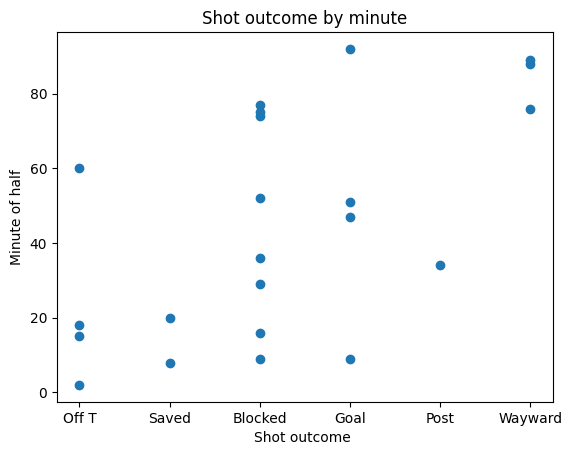

Plot 1:shot outcome  by minute:



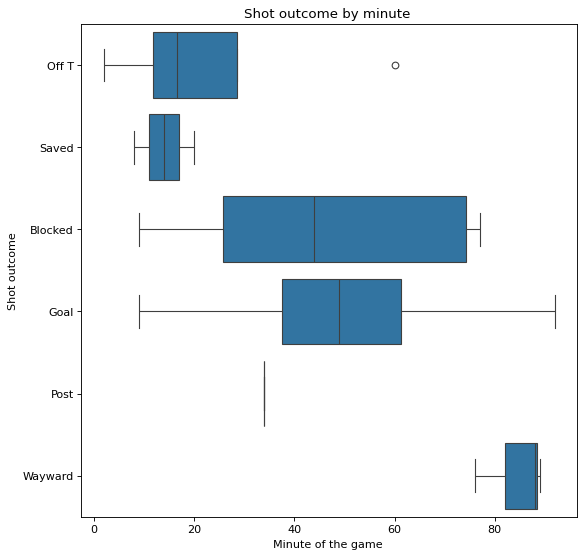

Plot 1:shot outcome  by minute interpretation:
:Shots off target occur more frequently in the first half. While saves tend to be made earlier in the game 
 blocks occur throughout the game
shots are taken during the whole game while there is a noticeable wayward shot occurrence during the end of the second half
________________________________________Shot outcome by second _______________________________________________________
Mean Shot outcome by second:
shot_outcome
Blocked    27.125000
Goal       32.000000
Off T      42.500000
Post       57.000000
Saved      35.000000
Wayward    39.666667
Name: second, dtype: float64

Median Shot outcome by Second:
shot_outcome
Blocked    29.5
Goal       34.5
Off T      41.0
Post       57.0
Saved      35.0
Wayward    43.0
Name: second, dtype: float64
Plot 2:shot outcome by second:



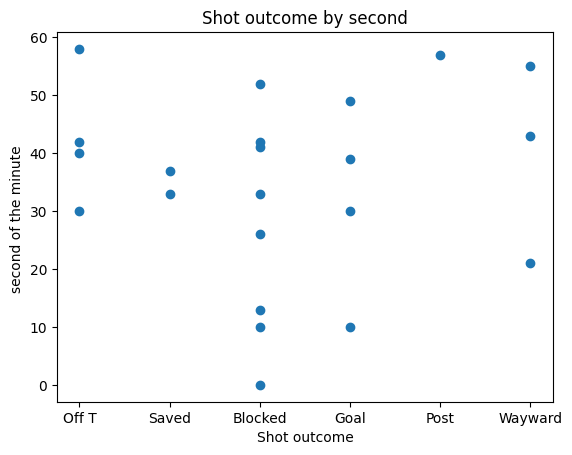

Plot 2:shot outcome by second:



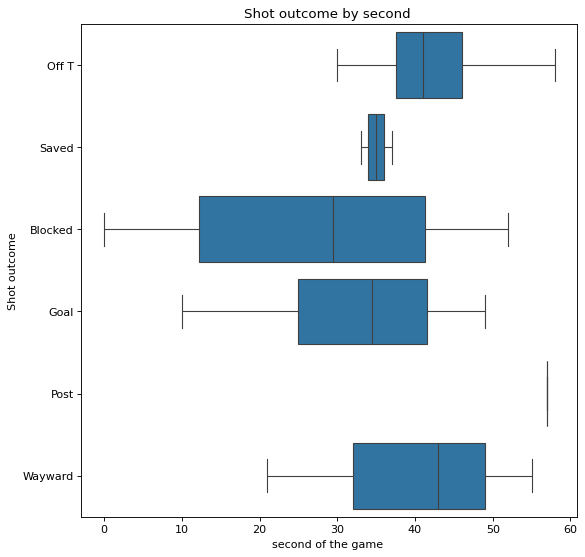

Plot 2:shot outcome by second interpretation:
Shots that are off target or irregular have a higher frequency of happening in the later stage of the minute 
 Goals occurred around the 25 to 40 second mark 
 Shots blocked occurred frequently during the game 

________________________________________shot outcome by pass length _______________________________________________________
Mean Shot outcome by Pass length :
shot_outcome
Blocked    0.0
Goal       0.0
Off T      0.0
Post       0.0
Saved      0.0
Wayward    0.0
Name: pass_length, dtype: float64

Median Shot outcome by pass length :
shot_outcome
Blocked    0.0
Goal       0.0
Off T      0.0
Post       0.0
Saved      0.0
Wayward    0.0
Name: pass_length, dtype: float64
Plot 3:shot outcome by pass length:



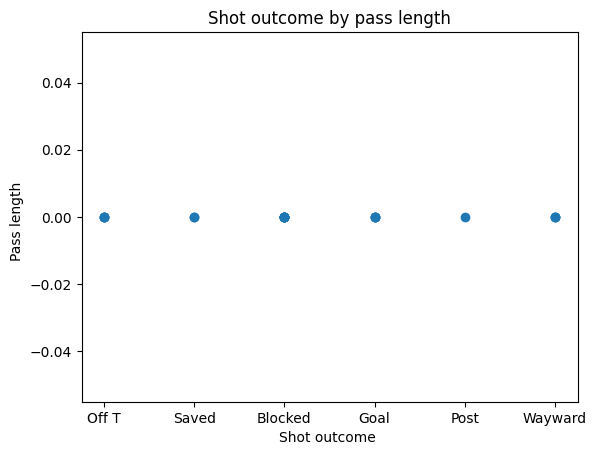

Plot 3:shot outcome by pass length:



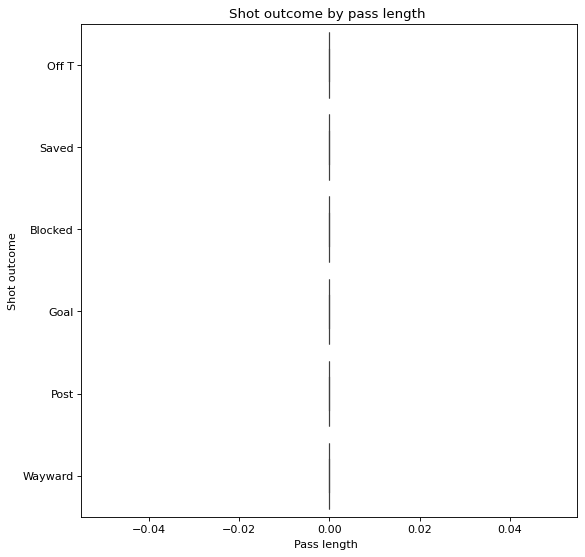

Plot 3:shot outcome by pass length interpretation:
There is no correlation between the pass length and the shot outcome



In [372]:
print("________________________________________Shot outcome by minute _______________________________________________________")
#Investigate Shot outcome and minute columns from our dataset.

filtered_shot_outcome = data[data['shot_outcome'] != 'N/A']

#groupby the response to find the mean and median of the Shot outcome with minutes separately.
print("Mean Shot outcome by minute:")
mean_shot_outcome_minute=filtered_shot_outcome.groupby('shot_outcome')['minute'].mean()
print(mean_shot_outcome_minute)

print("\nMedian Shot outcome by minute:")
print(filtered_shot_outcome.groupby('shot_outcome')['minute'].median())

#plot the boxplot of Shot outcome by minute
plt.scatter(filtered_shot_outcome['shot_outcome'],filtered_shot_outcome['minute'])
plt.title("Shot outcome by minute")
plt.xlabel("Shot outcome ")
plt.ylabel("Minute of half")
print("Plot 1:shot outcome  by minute:\n")
plt.show()



# display the boxplot of Shot outcome by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_outcome['minute'], y=filtered_shot_outcome['shot_outcome'])
plt.title("Shot outcome by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Shot outcome")
print("Plot 1:shot outcome  by minute:\n")
plt.show()
print("Plot 1:shot outcome  by minute interpretation:\n:Shots off target occur more frequently in the first half. While saves tend to be made earlier in the game \n blocks occur throughout the game\nshots are taken during the whole game while there is a noticeable wayward shot occurrence during the end of the second half")
 



print("________________________________________Shot outcome by second _______________________________________________________")

 #Investigate shot outcome and minute columns from our dataset.

#groupby the response to find the mean and median of the Shot outcome with second separately.
print("Mean Shot outcome by second:")
mean_shot_outcome_second=filtered_shot_outcome.groupby('shot_outcome')['second'].mean()
print(mean_shot_outcome_second)

print("\nMedian Shot outcome by Second:")
print(filtered_shot_outcome.groupby('shot_outcome')['second'].median())

#plot the boxplot of Shot outcome by second
plt.scatter(filtered_shot_outcome['shot_outcome'],filtered_shot_outcome['second'])
plt.title("Shot outcome by second")
plt.xlabel("Shot outcome")
plt.ylabel("second of the minute ")
print("Plot 2:shot outcome by second:\n")
plt.show()



# display the boxplot of Shot outcome by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_outcome['second'], y=filtered_shot_outcome['shot_outcome'])
plt.title("Shot outcome by second ")
plt.xlabel("second of the game ")
plt.ylabel("Shot outcome")
print("Plot 2:shot outcome by second:\n")
plt.show()
print("Plot 2:shot outcome by second interpretation:\nShots that are off target or irregular have a higher frequency of happening in the later stage of the minute \n Goals occurred around the 25 to 40 second mark \n Shots blocked occurred frequently during the game \n")


print("________________________________________shot outcome by pass length _______________________________________________________")
 #Investigate shot outcome and pass length  columns from our dataset.

#groupby the response to find the mean and median of the shot outcome with pass length  separately.
print("Mean Shot outcome by Pass length :")
mean_shot_outcome_by_pass_length=filtered_shot_outcome.groupby('shot_outcome')['pass_length'].mean()
print(mean_shot_outcome_by_pass_length)

print("\nMedian Shot outcome by pass length :")
print(filtered_shot_outcome.groupby('shot_outcome')['pass_length'].median())

#plot the boxplot of shot outcome by pass length
plt.scatter(filtered_shot_outcome['shot_outcome'],filtered_shot_outcome['pass_length'])
plt.title("Shot outcome by pass length")
plt.xlabel("Shot outcome ")
plt.ylabel("Pass length  ")
print("Plot 3:shot outcome by pass length:\n")
plt.show()


# display the boxplot of shot outcome by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_shot_outcome['pass_length'], y=filtered_shot_outcome['shot_outcome'])
plt.title("Shot outcome by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Shot outcome")
print("Plot 3:shot outcome by pass length:\n")
plt.show()
print("Plot 3:shot outcome by pass length interpretation:\nThere is no correlation between the pass length and the shot outcome\n")



#### Pass outcome

________________________________________Pass outcome by minute _______________________________________________________
Mean Pass outcome by minute:
pass_outcome
Complete            45.275753
Incomplete          47.700000
Injury Clearance    68.000000
Out                 42.892857
Pass Offside        56.000000
Unknown             56.750000
Name: minute, dtype: float64

Median Pass outcome by minute:
pass_outcome
Complete            45.0
Incomplete          49.0
Injury Clearance    68.0
Out                 42.5
Pass Offside        67.0
Unknown             68.0
Name: minute, dtype: float64
Plot 1: Pass outcome by minute:



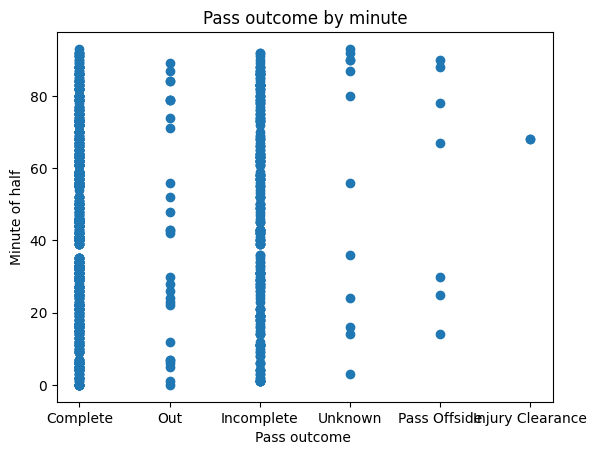

Plot 1: Pass outcome by minute:



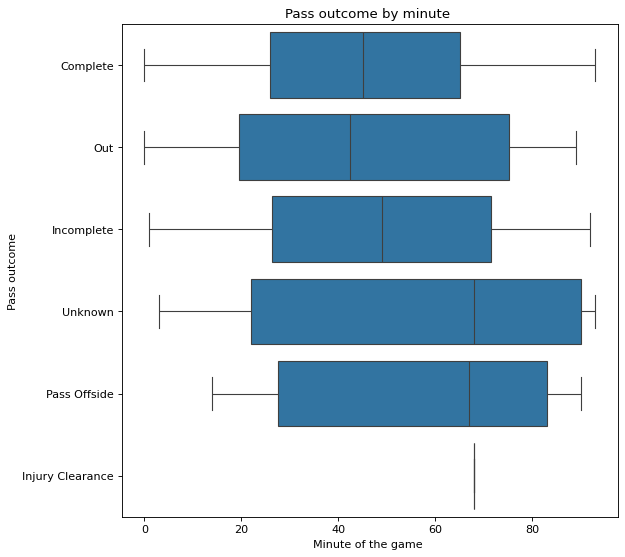

Plot 1: Pass outcome by minute interpretation:
On average complete passes , out passes and incomplete passes occur throughout the game at an average of the 45th min 
 while unknown passes and offside passes occur more frequently in the second half

________________________________________Pass outcome by second _______________________________________________________
Mean Pass outcome by second:
pass_outcome
Complete            30.093502
Incomplete          27.921739
Injury Clearance    45.000000
Out                 31.607143
Pass Offside        22.285714
Unknown             28.833333
Name: second, dtype: float64

Median Pass outcome by Second:
pass_outcome
Complete            31.0
Incomplete          26.0
Injury Clearance    45.0
Out                 29.0
Pass Offside        20.0
Unknown             23.5
Name: second, dtype: float64
Plot 2: Pass outcome by second:



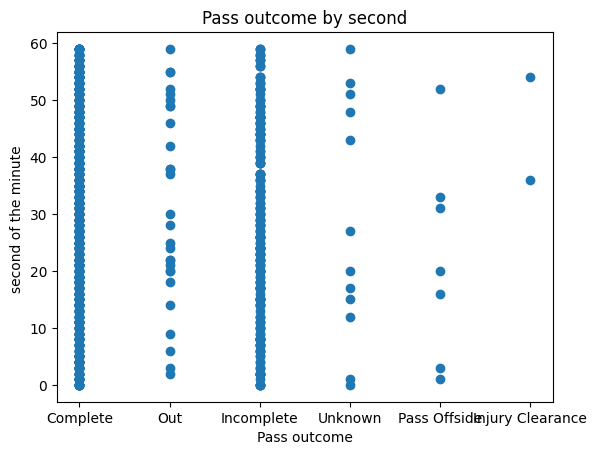

Plot 2: Pass outcome by second:



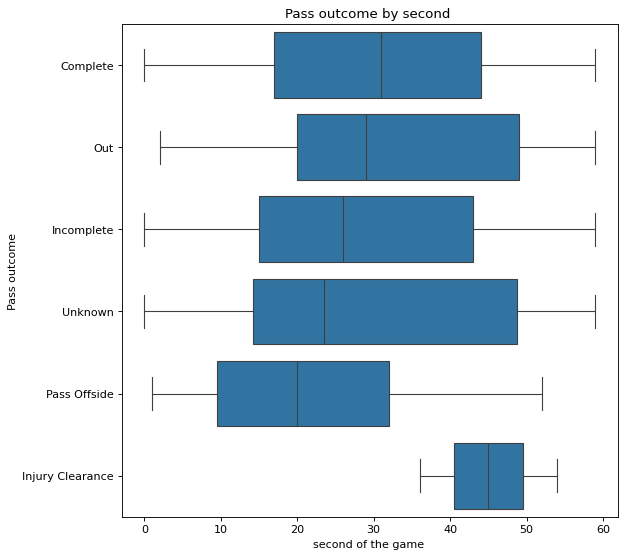

Plot 2: Pass outcome by second interpretation:
The average occurrence for complete, out and incomplete are similar occurring around the same period of a minute 
while passes that where offside happened more frequently earlier in the minute 
 while injury cleaned occurred later on in the minute
 
________________________________________Pass outcome by pass length _______________________________________________________
Mean Pass outcome by Pass length :
pass_outcome
Complete            21.585103
Incomplete          26.478261
Injury Clearance    15.150000
Out                 35.707143
Pass Offside        36.957143
Unknown             34.616667
Name: pass_length, dtype: float64

Median Pass outcome by pass length :
pass_outcome
Complete            17.60
Incomplete          24.40
Injury Clearance    15.15
Out                 31.25
Pass Offside        43.20
Unknown             28.55
Name: pass_length, dtype: float64
Plot 3: Pass outcome by pass length:



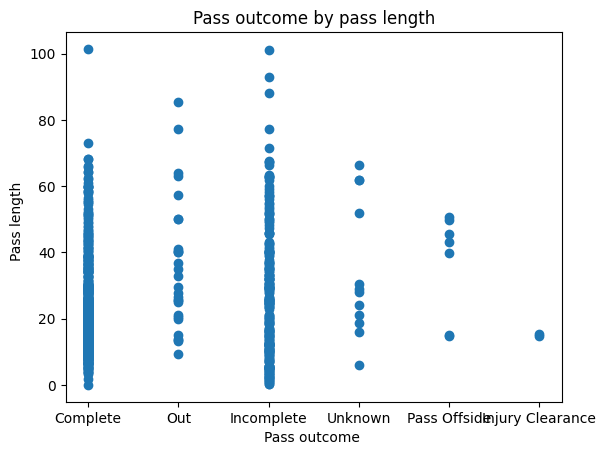

Plot 3: Pass outcome by pass length:



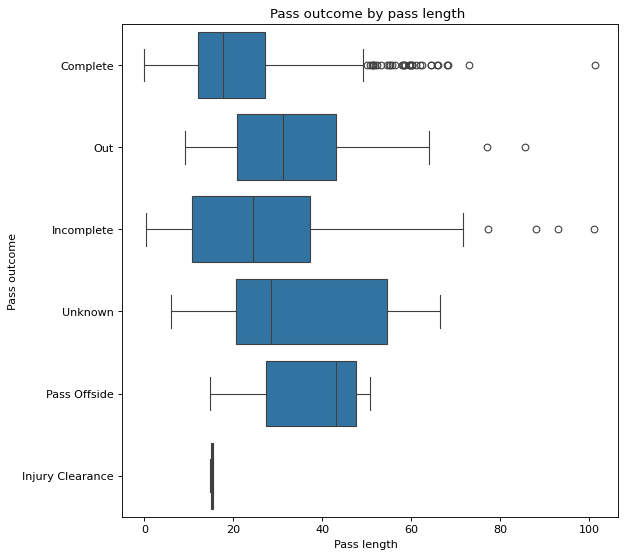

Plot 3: Pass outcome by pass length interpretation:
On average, completed passes where between the 15 to 25 mark 
 passes that went out of play where on average between the 20 to 45 meter mark
 incomplete passes fall between complete passes and out passes
 Passes that where offside occurred at an average length of 25+ meters


In [373]:
print("________________________________________Pass outcome by minute _______________________________________________________")
#Investigate Pass outcome and minute columns from our dataset.

filtered_pass_outcome = data[data['pass_outcome'] != 'N/A']

#groupby the response to find the mean and median of the pass outcome with minutes separately.
print("Mean Pass outcome by minute:")
mean_pass_outcome_minute=filtered_pass_outcome.groupby('pass_outcome')['minute'].mean()
print(mean_pass_outcome_minute)

print("\nMedian Pass outcome by minute:")
print(filtered_pass_outcome.groupby('pass_outcome')['minute'].median())

#plot the boxplot of Pass outcome by minute
plt.scatter(filtered_pass_outcome['pass_outcome'],filtered_pass_outcome['minute'])
plt.title("Pass outcome by minute")
plt.xlabel("Pass outcome ")
plt.ylabel("Minute of half")
print("Plot 1: Pass outcome by minute:\n")
plt.show()



# display the boxplot of Pass outcome by minute
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_pass_outcome['minute'], y=filtered_pass_outcome['pass_outcome'])
plt.title("Pass outcome by minute ")
plt.xlabel("Minute of the game ")
plt.ylabel("Pass outcome")
print("Plot 1: Pass outcome by minute:\n")
plt.show()
print("Plot 1: Pass outcome by minute interpretation:\nOn average complete passes , out passes and incomplete passes occur throughout the game at an average of the 45th min \n while unknown passes and offside passes occur more frequently in the second half\n")
 

print("________________________________________Pass outcome by second _______________________________________________________")

 #Investigate Pass outcome and minute columns from our dataset.

#groupby the response to find the mean and median of the Pass outcome with second separately.
print("Mean Pass outcome by second:")
mean_pass_outcome_second=filtered_pass_outcome.groupby('pass_outcome')['second'].mean()
print(mean_pass_outcome_second)

print("\nMedian Pass outcome by Second:")
print(filtered_pass_outcome.groupby('pass_outcome')['second'].median())

#plot the boxplot of Pass outcome by second
plt.scatter(filtered_pass_outcome['pass_outcome'],filtered_pass_outcome['second'])
plt.title("Pass outcome by second")
plt.xlabel("Pass outcome")
plt.ylabel("second of the minute ")
print("Plot 2: Pass outcome by second:\n")
plt.show()



# display the boxplot of Pass outcome by second
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_pass_outcome['second'], y=filtered_pass_outcome['pass_outcome'])
plt.title("Pass outcome by second ")
plt.xlabel("second of the game ")
plt.ylabel("Pass outcome")
print("Plot 2: Pass outcome by second:\n")
plt.show()
print("Plot 2: Pass outcome by second interpretation:\nThe average occurrence for complete, out and incomplete are similar occurring around the same period of a minute \nwhile passes that where offside happened more frequently earlier in the minute \n while injury cleaned occurred later on in the minute\n ")

print("________________________________________Pass outcome by pass length _______________________________________________________")
 #Investigate Pass outcome and pass length  columns from our dataset.

#groupby the response to find the mean and median of the Pass outcome with pass length  separately.
print("Mean Pass outcome by Pass length :")
mean_pass_outcome_by_pass_length=filtered_pass_outcome.groupby('pass_outcome')['pass_length'].mean()
print(mean_pass_outcome_by_pass_length)

print("\nMedian Pass outcome by pass length :")
print(filtered_pass_outcome.groupby('pass_outcome')['pass_length'].median())

#plot the boxplot of Pass outcome by pass length
plt.scatter(filtered_pass_outcome['pass_outcome'],filtered_pass_outcome['pass_length'])
plt.title("Pass outcome by pass length")
plt.xlabel("Pass outcome ")
plt.ylabel("Pass length  ")
print("Plot 3: Pass outcome by pass length:\n")
plt.show()


# display the boxplot of Pass outcome by pass length
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=filtered_pass_outcome['pass_length'], y=filtered_pass_outcome['pass_outcome'])
plt.title("Pass outcome by pass length ")
plt.xlabel("Pass length  ")
plt.ylabel("Pass outcome")
print("Plot 3: Pass outcome by pass length:\n")
plt.show()
print("Plot 3: Pass outcome by pass length interpretation:\nOn average, completed passes where between the 15 to 25 mark \n passes that went out of play where on average between the 20 to 45 meter mark\n incomplete passes fall between complete passes and out passes\n Passes that where offside occurred at an average length of 25+ meters")


### Categorical - Categorical

#### Pass outcome

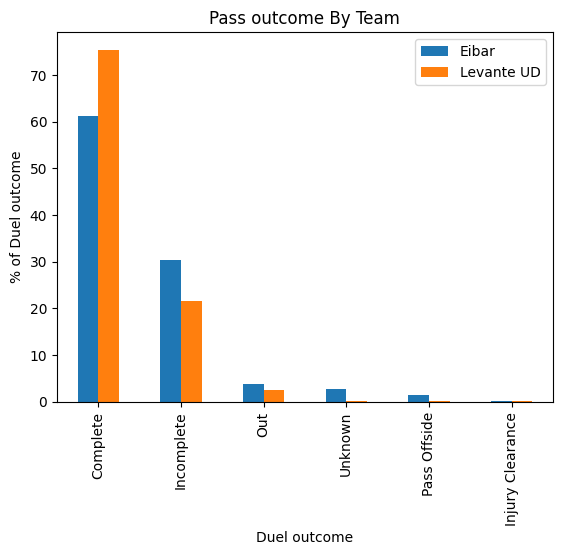

x


In [374]:
#________________________________________Pass outcome/ shot body part _______________________________________________________

#________________________________________Pass outcome/ shot outcome _______________________________________________________

#________________________________________Pass outcome/ team _______________________________________________________

filtered_pass_outcome = data[(data['pass_outcome'] != 'N/A')]

eibar_data = filtered_pass_outcome[filtered_pass_outcome['team'] == 'Eibar']
levante_data = filtered_pass_outcome[filtered_pass_outcome['team'] == 'Levante UD'] 

# Calculate the percentage of each pass outcome probability by team.
eibar_data_percentages = eibar_data['pass_outcome'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['pass_outcome'].value_counts(normalize=True)*100

# Plot the bar chart for the pass outcome by team .
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Pass outcome By Team")
plt.xlabel("Duel outcome")
plt.ylabel("% of Duel outcome")
plt.show() #Show the plot
print("x") 



#### Shot body part

C:\Users\wwwno\AppData\Local\Temp\ipykernel_5028\357704702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_shot_body_part['right_foot_shot']= np.where(filtered_shot_body_part['shot_body_part']=='Right Foot',1,0)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_5028\357704702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_shot_body_part['header_shot']= np.where(filtered_shot_body_part['shot_body_part']=='Head',1,0)
C:\Users\wwwno\AppData\Local\Temp\ipykernel_5028\357704702.py:7: Setting

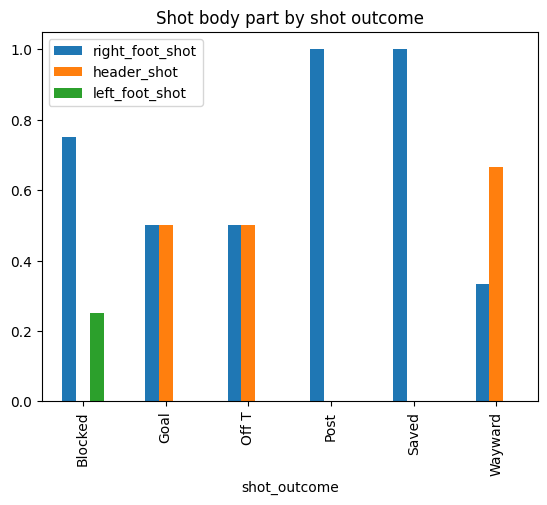

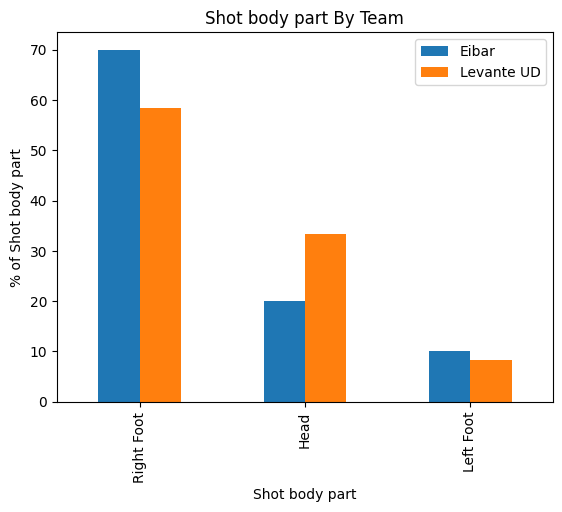

x


In [391]:
filtered_shot_body_part = data[(data['shot_body_part'] != 'N/A')]
#________________________________________Shot body part/ shot outcome _______________________________________________________
filtered_shot_body_part.value_counts()

filtered_shot_body_part['right_foot_shot']= np.where(filtered_shot_body_part['shot_body_part']=='Right Foot',1,0)
filtered_shot_body_part['header_shot']= np.where(filtered_shot_body_part['shot_body_part']=='Head',1,0)
filtered_shot_body_part['left_foot_shot']= np.where(filtered_shot_body_part['shot_body_part']=='Left Foot',1,0)

shotByPartByShotOutcome = filtered_shot_body_part.groupby('shot_outcome')[['right_foot_shot','header_shot','left_foot_shot']].mean()

shotByPartByShotOutcome.plot.bar()
plt.title("Shot body part by shot outcome")
plt.show()


#________________________________________Shot body part/ team _______________________________________________________

eibar_data = filtered_shot_body_part[filtered_shot_body_part['team'] == 'Eibar']
levante_data = filtered_shot_body_part[filtered_shot_body_part['team'] == 'Levante UD'] 

# Calculate the percentage of each pass outcome probability by team.
eibar_data_percentages = eibar_data['shot_body_part'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['shot_body_part'].value_counts(normalize=True)*100

# Plot the bar chart for the pass outcome by team .
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Shot body part By Team")
plt.xlabel("Shot body part")
plt.ylabel("% of Shot body part")
plt.show() #Show the plot
print("x") 





#### Shot outcome

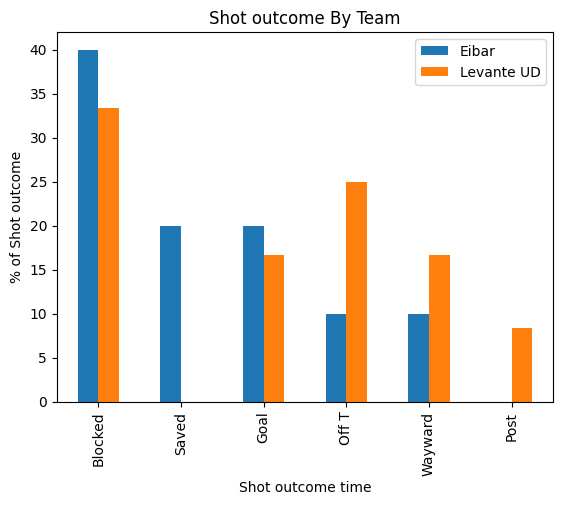

x


In [376]:
 #________________________________________Shot outcome/ team _______________________________________________________

filtered_shot_outcome = data[(data['shot_outcome'] != 'N/A')]

eibar_data = filtered_shot_outcome[filtered_shot_outcome['team'] == 'Eibar']
levante_data = filtered_shot_outcome[filtered_shot_outcome['team'] == 'Levante UD'] 

# Calculate the percentage of each Shot outcome probability by team.
eibar_data_percentages = eibar_data['shot_outcome'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['shot_outcome'].value_counts(normalize=True)*100

# Plot the bar chart for the Shot outcome by team .
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Shot outcome By Team")
plt.xlabel("Shot outcome time")
plt.ylabel("% of Shot outcome")
plt.show() #Show the plot
print("x") 

## Multivariate Analysis

               minute    second  pass_length
minute       1.000000 -0.011631      0.09180
second      -0.011631  1.000000     -0.01931
pass_length  0.091800 -0.019310      1.00000


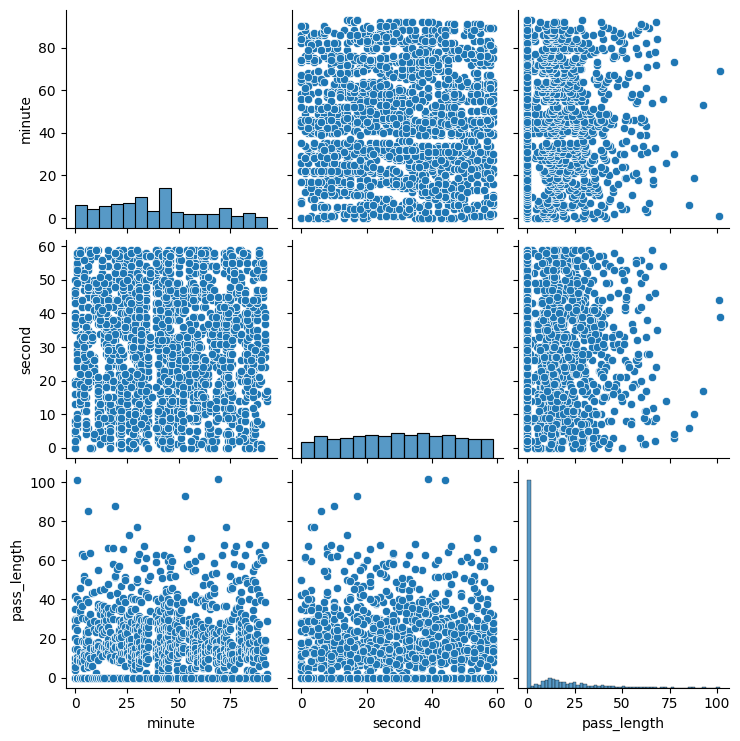

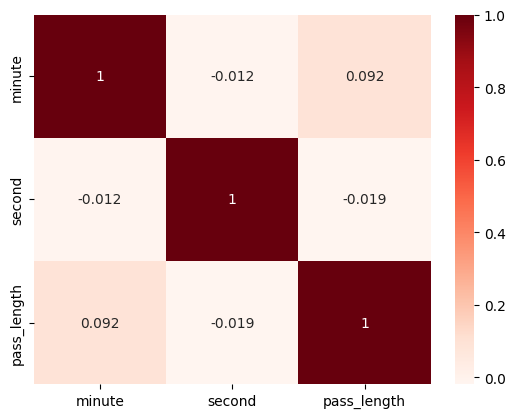

In [377]:
#________________________________________Regular shot / target /period +- 5 before the end of the half_______________________________________________________
#9.Analyzing the probability of a player trying to take a regular shot on goal near the end of the first and second halves(+/- 5 minutes before the half ends


#10. 5.Investigating which team is more likely to fail a tackle in the first half compared to the second half



#If we analyze data by taking there or more variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
#Let’s investigate how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.
#First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

#Pivot table automatically uses the mean value of the response_rate argument.
####result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
####print(result)

#create heat map of education vs marital vs response_rate
###figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
###sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
###plt.show()

#Based on the Heatmap we can infer that the married people with primary education are less likely to respond positively for the survey and single people with tertiary education are most likely to respond positively to the survey.
#Similarly, we can plot the graphs for Job vs marital vs response, Education vs poutcome vs response, etc.



#________________________________________Minute / second / pass length _______________________________________________________

# Creating a matrix using period, minute, pass_length as rows and columns
print(data[['minute','second','pass_length']].corr())

sns.pairplot(data = data, vars=['minute','second','pass_length'])
plt.show()
 

#plot the correlation matrix of period, minute and pass_length in data dataframe.
sns.heatmap(data[['minute','second','pass_length']].corr(), annot=True, cmap = 'Reds')
plt.show()

#________________________________________Minute / period / pass length _______________________________________________________




# 5 - Feature Engineering:

In [378]:
data.info()
data.head()
print(data.describe())

#Check data clean
print("Missing Values")
data.isnull().sum() #Clean data with no missing values

#########Feature Engineering Step 1: Identify Variables


#Minute - predictor variable - numerical
#Pass length - predictor variable - numerical
#Pass outcome- predictor variable - categorical
#Second - predictor variable - numerical 
#Shot body part - predictor variable - categorical
#Shot outcome - predictor variable - categoricall
#Team - predictor variable - categorical


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minute           2614 non-null   int64  
 1   pass_length      2614 non-null   float64
 2   pass_outcome     2614 non-null   object 
 3   second           2614 non-null   int64  
 4   shot_body_part   2614 non-null   object 
 5   shot_outcome     2614 non-null   object 
 6   team             2614 non-null   object 
 7   shot_body_parts  2614 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 153.3+ KB
            minute  pass_length       second  shot_body_parts
count  2614.000000  2614.000000  2614.000000           2614.0
mean     41.444529     8.192196    29.761285              0.0
std      25.125764    14.621349    16.622057              0.0
min       0.000000     0.000000     0.000000              0.0
25%      21.000000     0.000000    16.000000      

minute             0
pass_length        0
pass_outcome       0
second             0
shot_body_part     0
shot_outcome       0
team               0
shot_body_parts    0
dtype: int64

#### Converting Columns to Floats

In [379]:
#data = pd.get_dummies(data, columns=['duel_outcome'])
#df_new = pd.concat([data, data['duel_outcome']], axis=1)
#print(df_new)

In [380]:
#data = pd.get_dummies(data, columns=['shot_technique'])
##data['Normal'] = ['Normal'].astype(int)
#data['Half Volley'] = data['Half Volley'].astype(int)
#data['Volley'] = data['Volley'].astype(int)

#print(data)



In [381]:


print("Unique seconds:")
print(len(data.second.unique())) # second to be dropped
data.second.unique()
data.drop('second', axis = 1, inplace = True)



Unique seconds:
60


In [382]:
#data = data.replace('N/A', np.nan)
#corrVals=data.corr()
#print(corrVals)

# 6 – Predictive Modelling:

# 7 – Findings:

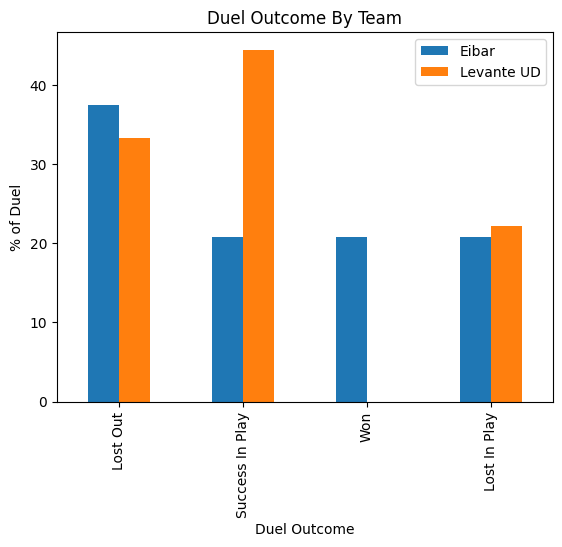

Levante have a marginally better tackling success rate than Eibar


KeyError: 'shot_first_time'

In [383]:
#________________________________________Duel outcome / team _______________________________________________________

# Filter data by team and N/A from duel outcome above
eibar_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Eibar']
levante_data = filtered_DuelOutcome[filtered_DuelOutcome['team'] == 'Levante UD'] 

# Calculate the percentage of each duel outcome probability by team.
eibar_data_percentages = eibar_data['duel_outcome'].value_counts(normalize=True)*100
levante_data_percentages = levante_data['duel_outcome'].value_counts(normalize=True)*100

# Plot the bar chart for the duel outcome by team .
# It was a challenge to be able to joint the two teams together and compare them tried with hue at first. settled with using concat
team_dueling = pd.concat([eibar_data_percentages, levante_data_percentages], axis=1, keys=['Eibar', 'Levante UD'])
team_dueling.plot.bar()
plt.title("Duel Outcome By Team")
plt.xlabel("Duel Outcome")
plt.ylabel("% of Duel")
plt.show() #Show the plot
print("Levante have a marginally better tackling success rate than Eibar") 


#________________________________________Shot first time / goal_______________________________________________________


# Filter data by shot outcome to only be goal
goal_outcome_data = data[data['shot_outcome'] == 'Goal'] 

# Calculate the percentage of shots taken first time that where goals 
shot_firstime_percentages = goal_outcome_data['shot_first_time'].value_counts(normalize=True)*100

# Plot the bar chart for the goals outcome by first touch .
shot_firstime_percentages.plot.bar(color =['red','green'])
plt.title("First touch to Goal percentage")
plt.xlabel("First touch to Goal")
plt.ylabel("% Goal")

plt.show() #Show the plot
print("First touch goals make up 25% of all goals scored in the game") 

#________________________________________Header by goal and on target_______________________________________________________



#_______________________________________Total amount of passes leading to shots_______________________________________________________


# 8- References

In [ ]:
#Github Repo
#https://github.com/NojusMat/DataScience_CA2.git

#Converting column to float
#https://sparkbyexamples.com/pandas/pandas-convert-string-to-float-type-dataframe/#:~:text=Alternatively%2C%20you%20can%20convert%20all,'Discount'%20column%20to%20float.

#Panda Filters
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

# Combining two charts together
#https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas

#Concatenation
#https://www.dataquest.io/blog/pandas-concatenation-tutorial/

#Converting column to float
#https://www.projectpro.io/recipes/convert-categorical-variables-into-numerical-variables-in-python